In [9]:
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot
!pip install statsmodels

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


СКАЧИВАНИЕ И ИМПОРТИРОВАНИЕ НЕОБХОДИМЫХ БИБЛИОТЕК

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [89]:
# Подключаем гугл диск для работы с файлами на нем
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


СМОТР ДАННЫХ

In [4]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(20,10)})

In [5]:
train = pd.read_excel('gdrive/MyDrive/train.xlsx')
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [33]:
train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [34]:
train.fillna(method='bfill', inplace=True)
train

<ipython-input-34-dc3f6ebbfab1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [35]:
train.replace(np.nan, 0, inplace=True)
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [36]:
train = train.set_index(['dt'])

ПОСТРОЕНИЕ ГРАФИКА ВРЕМЕННОГО РЯДА

<Axes: title={'center': 'Time series'}, xlabel='dt', ylabel='Цена на арматуру'>

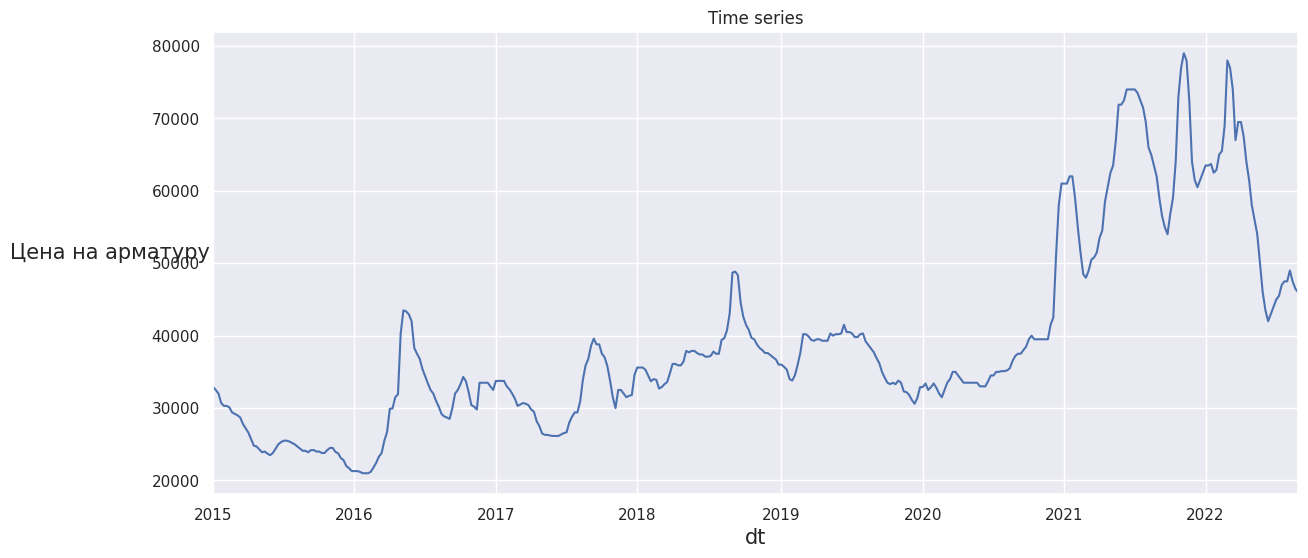

In [37]:
import matplotlib.pyplot as plt
# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Time series')
plt.xlabel('dt', fontsize=15)
plt.ylabel('Цена на арматуру', rotation=0, labelpad=30, fontsize=15)
train['Цена на арматуру'].plot()

<Axes: title={'center': 'Residual'}, xlabel='dt'>

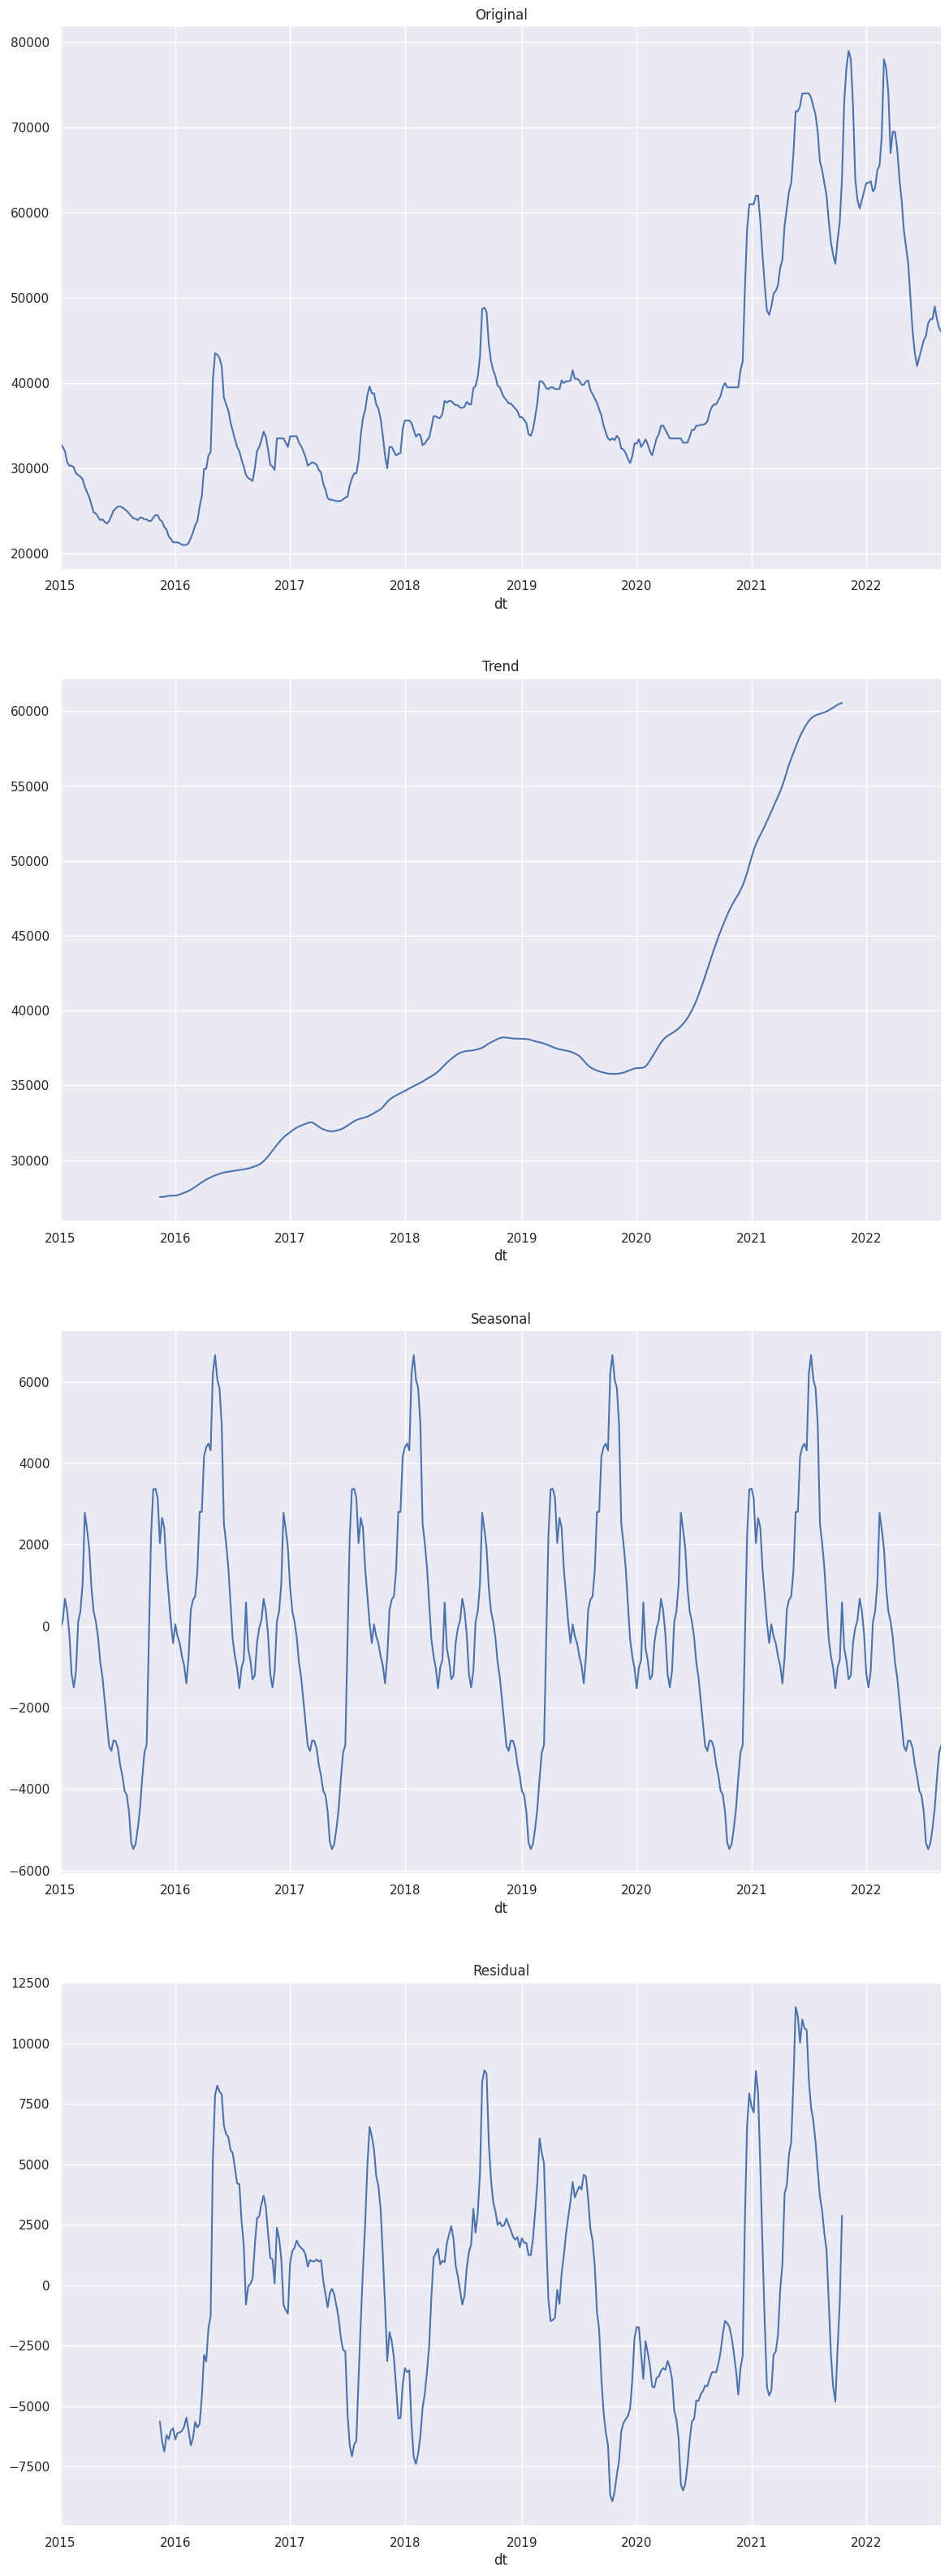

In [38]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(train[['Цена на арматуру']], period=90)

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3])

In [39]:
train = pd.read_excel('gdrive/MyDrive/train.xlsx')

# Сортировка значений (дата)
train = train.sort_values('dt').reset_index(drop=True)

АВТОКОРРЕЛЯЦИЯ

In [40]:
from statsmodels.tsa.stattools import acf
# Получил 'сырые' значения автокорреляций
acf(train['Цена на арматуру'], nlags=60, fft=False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023])

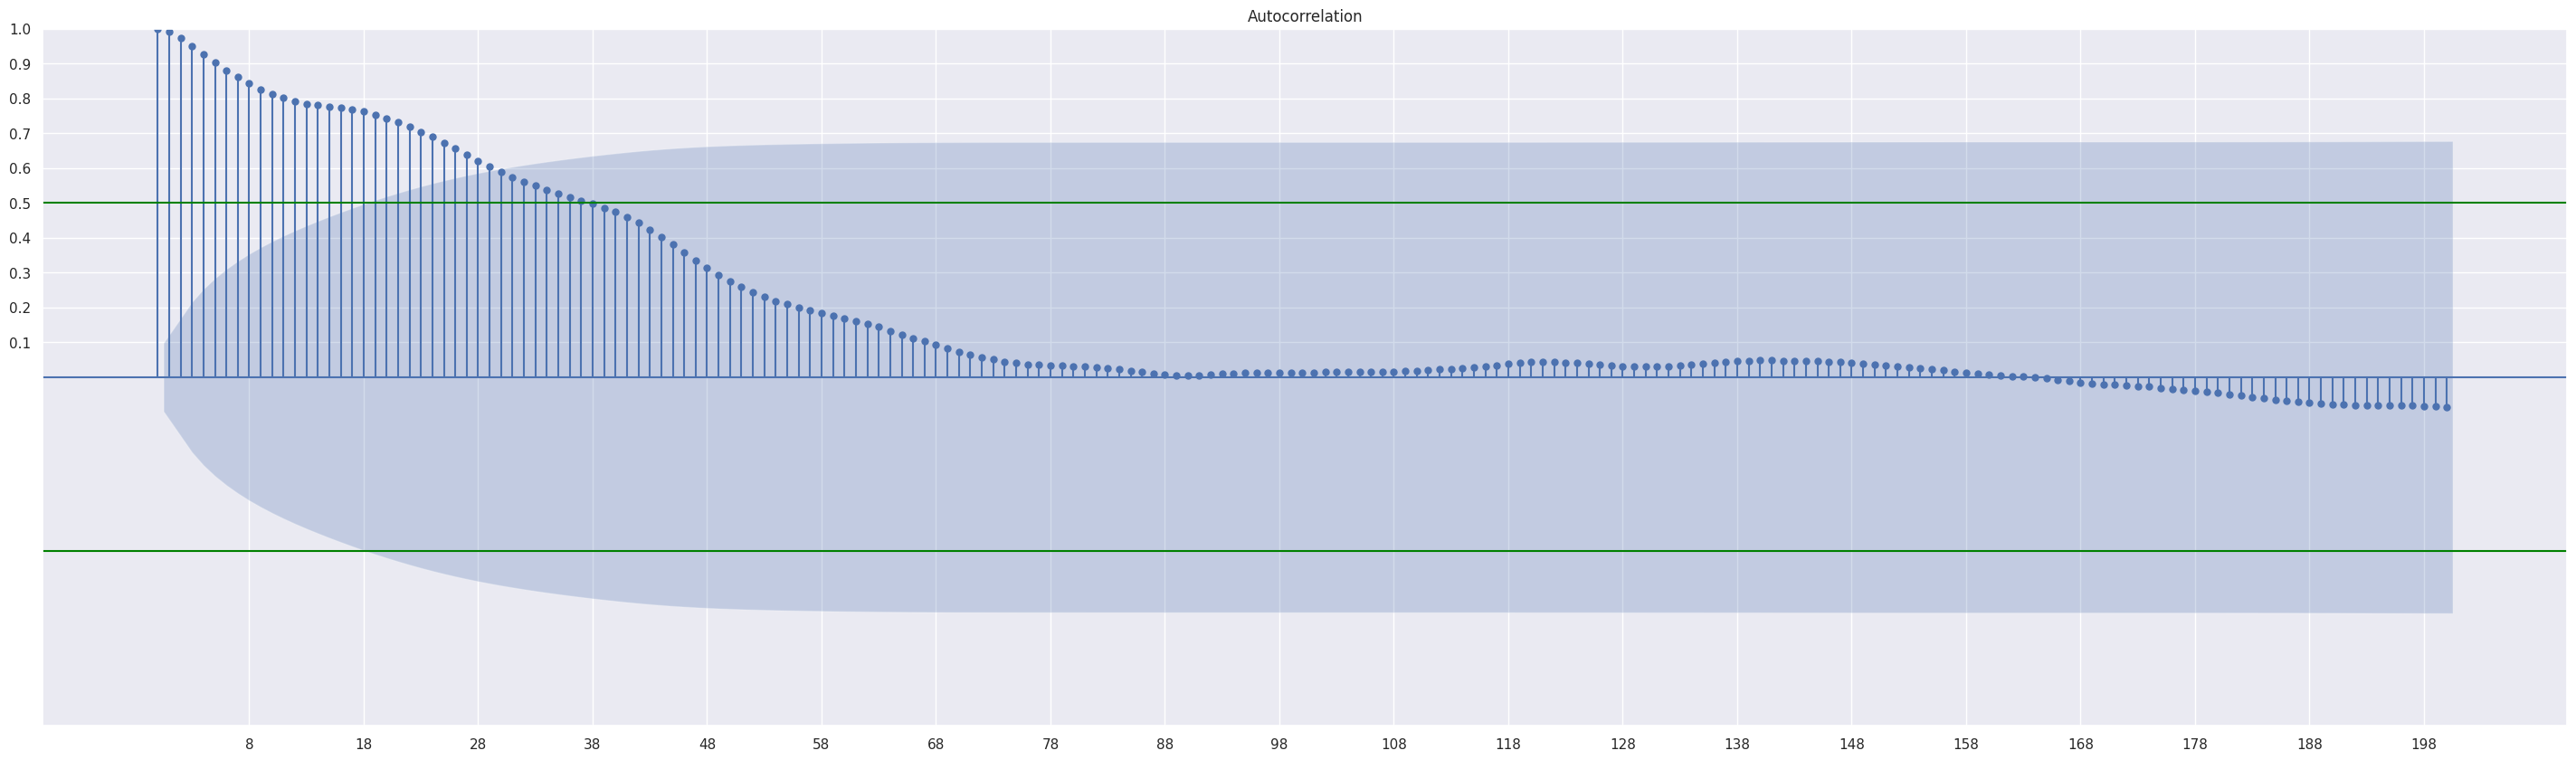

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
fig, ax = plt.subplots(figsize=(36,10))
plot_acf(train['Цена на арматуру'], lags=200, ax=ax)
# plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(8, 201, 10))
plt.axhline(y=0.5, color="green")
plt.axhline(y=-0.5, color="green")
plt.show()

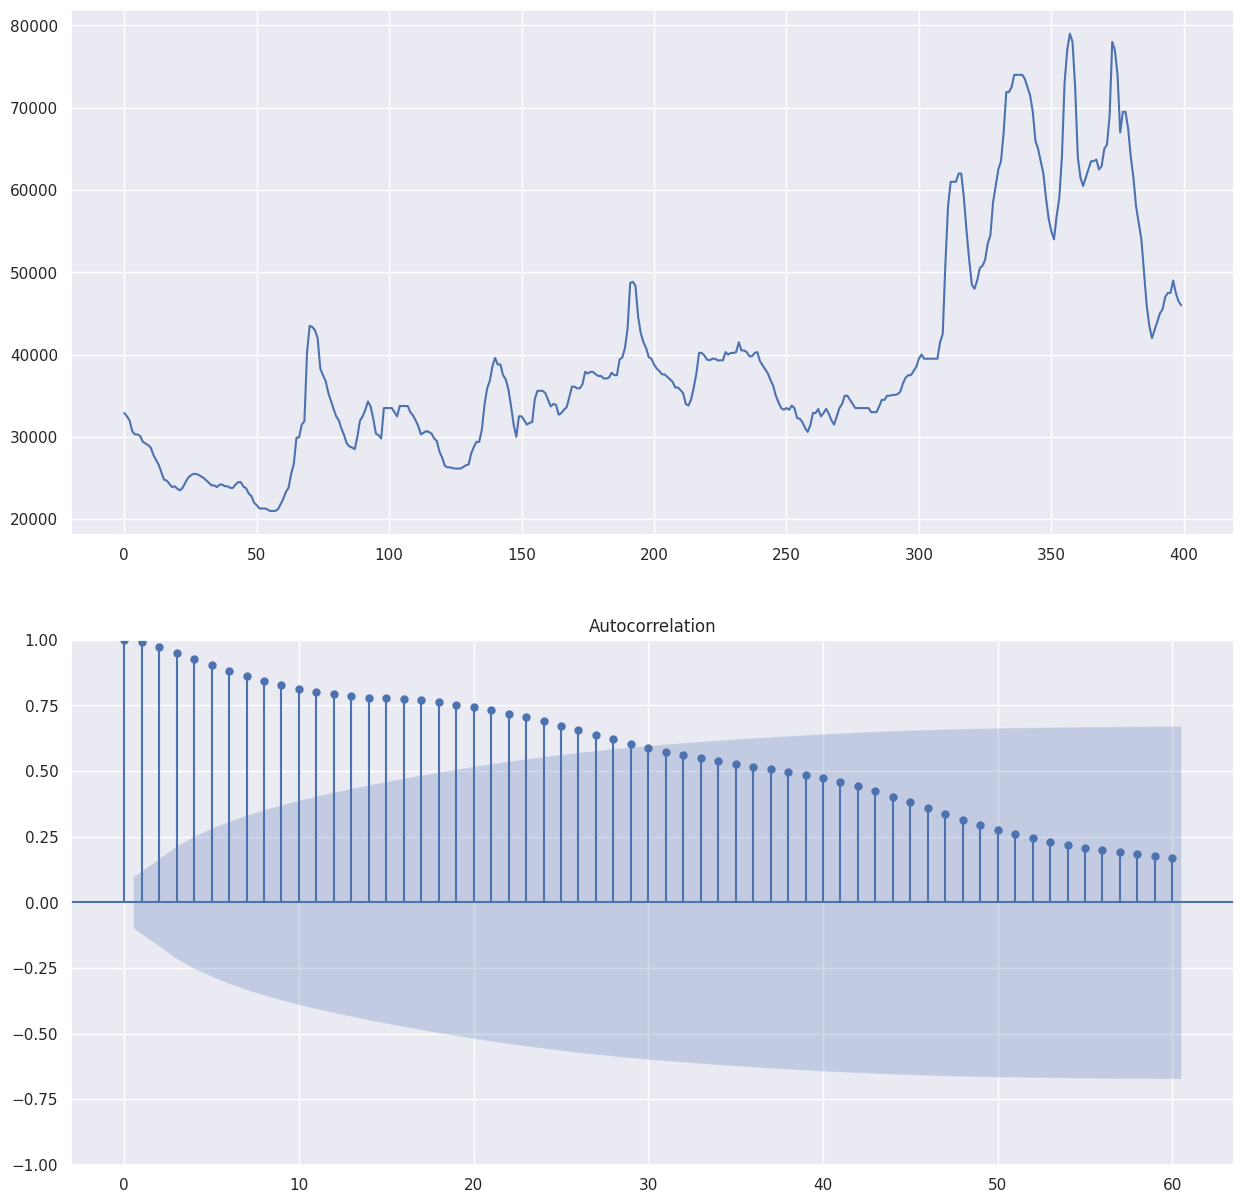

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
train['Цена на арматуру'].plot(ax=ax[0])
plot_acf(train['Цена на арматуру'], lags=60, ax=ax[1]);

СТАЦИОНАРНЫЙ РЯД

In [6]:
train.head()

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300


In [7]:
train['Цена на арматуруDiff_1'] = train['Цена на арматуру'] - train['Цена на арматуру'].shift(1)
train.head()

,dt,Цена на арматуру,Цена на арматуруDiff_1
0,2015-01-05,32900,NaN
1,2015-01-12,32500,-400.0
2,2015-01-19,32000,-500.0
3,2015-01-26,30700,-1300.0
4,2015-02-02,30300,-400.0


ВИЗУАЛЬНОЕ ОТОБРАЖЕНИЕ

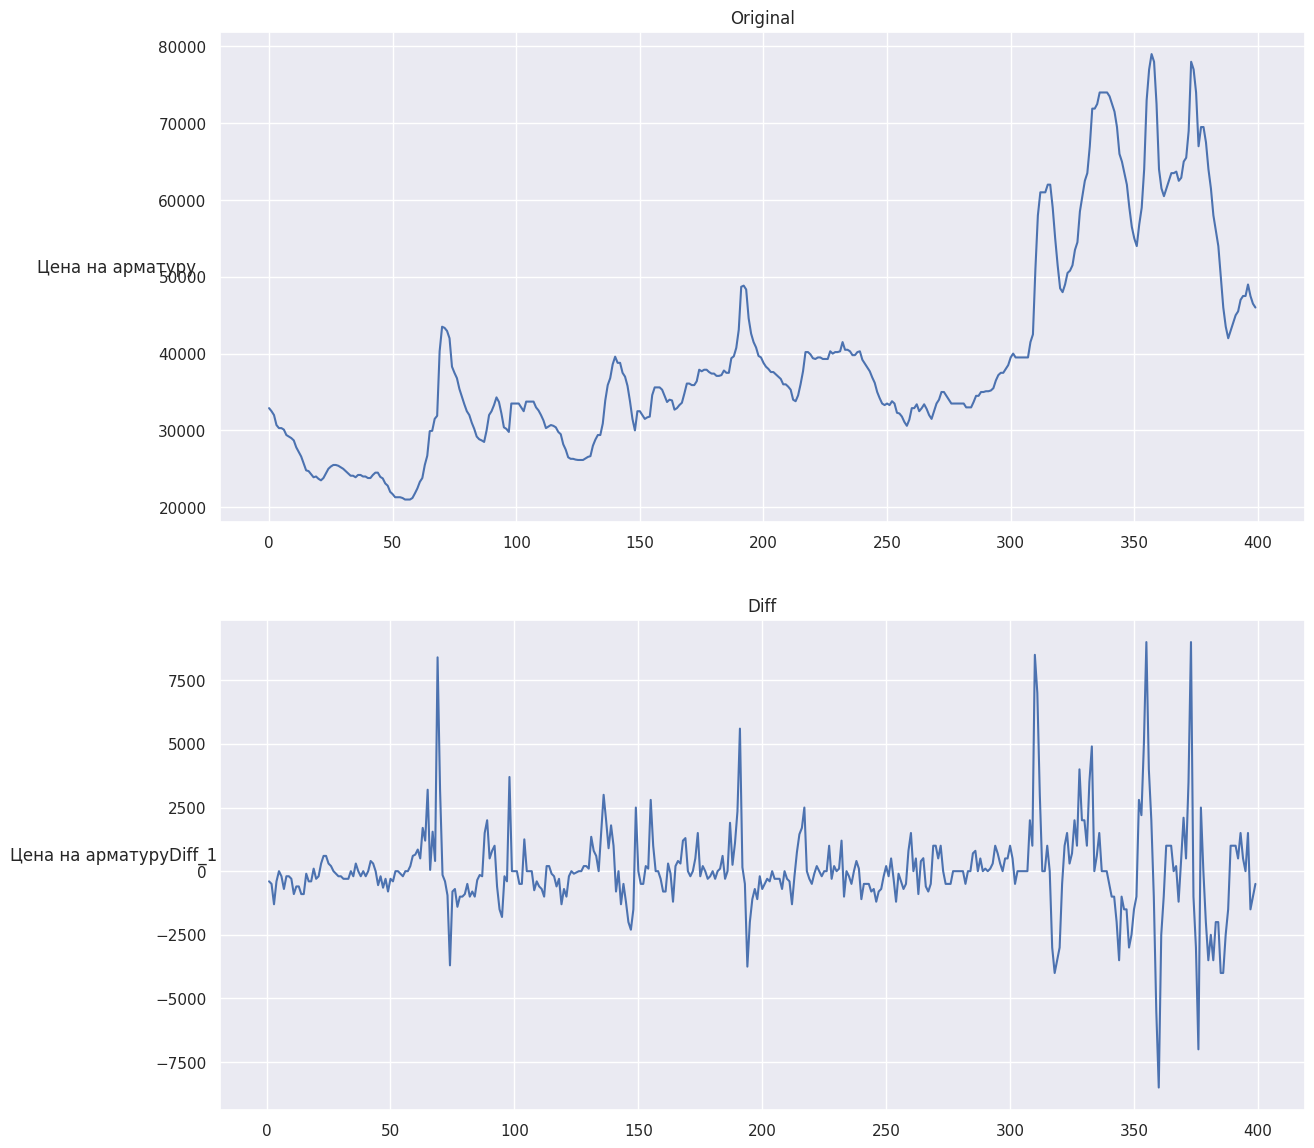

In [8]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('Цена на арматуру', rotation=0, labelpad=30)
train['Цена на арматуру'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('Цена на арматуруDiff_1', rotation=0, labelpad=30)
train['Цена на арматуруDiff_1'].plot(ax=ax);

In [11]:
# Проверим гипотезы для нового ряда

p_value = adfuller(train['Цена на арматуруDiff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)


Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


In [12]:
# Используем трюк с логарифмированием для уменьшения дисперсии и так же как и ранее составим диффериенцированный ряд
train['Цена на арматуруLog'] = np.log(train['Цена на арматуру'])
train['Цена на арматуруLogDiff_1'] = train['Цена на арматуруLog'] - train['Цена на арматуруLog'].shift(1)
train.head()

,dt,Цена на арматуру,Цена на арматуруDiff_1,Цена на арматуруLog,Цена на арматуруLogDiff_1
0,2015-01-05,32900,NaN,10.401228,NaN
1,2015-01-12,32500,-400.0,10.388995,-0.012233
2,2015-01-19,32000,-500.0,10.373491,-0.015504
3,2015-01-26,30700,-1300.0,10.332018,-0.041473
4,2015-02-02,30300,-400.0,10.318903,-0.013115


ВИЗУАЛЬНОЕ ОТОБРАЖЕНИЕ

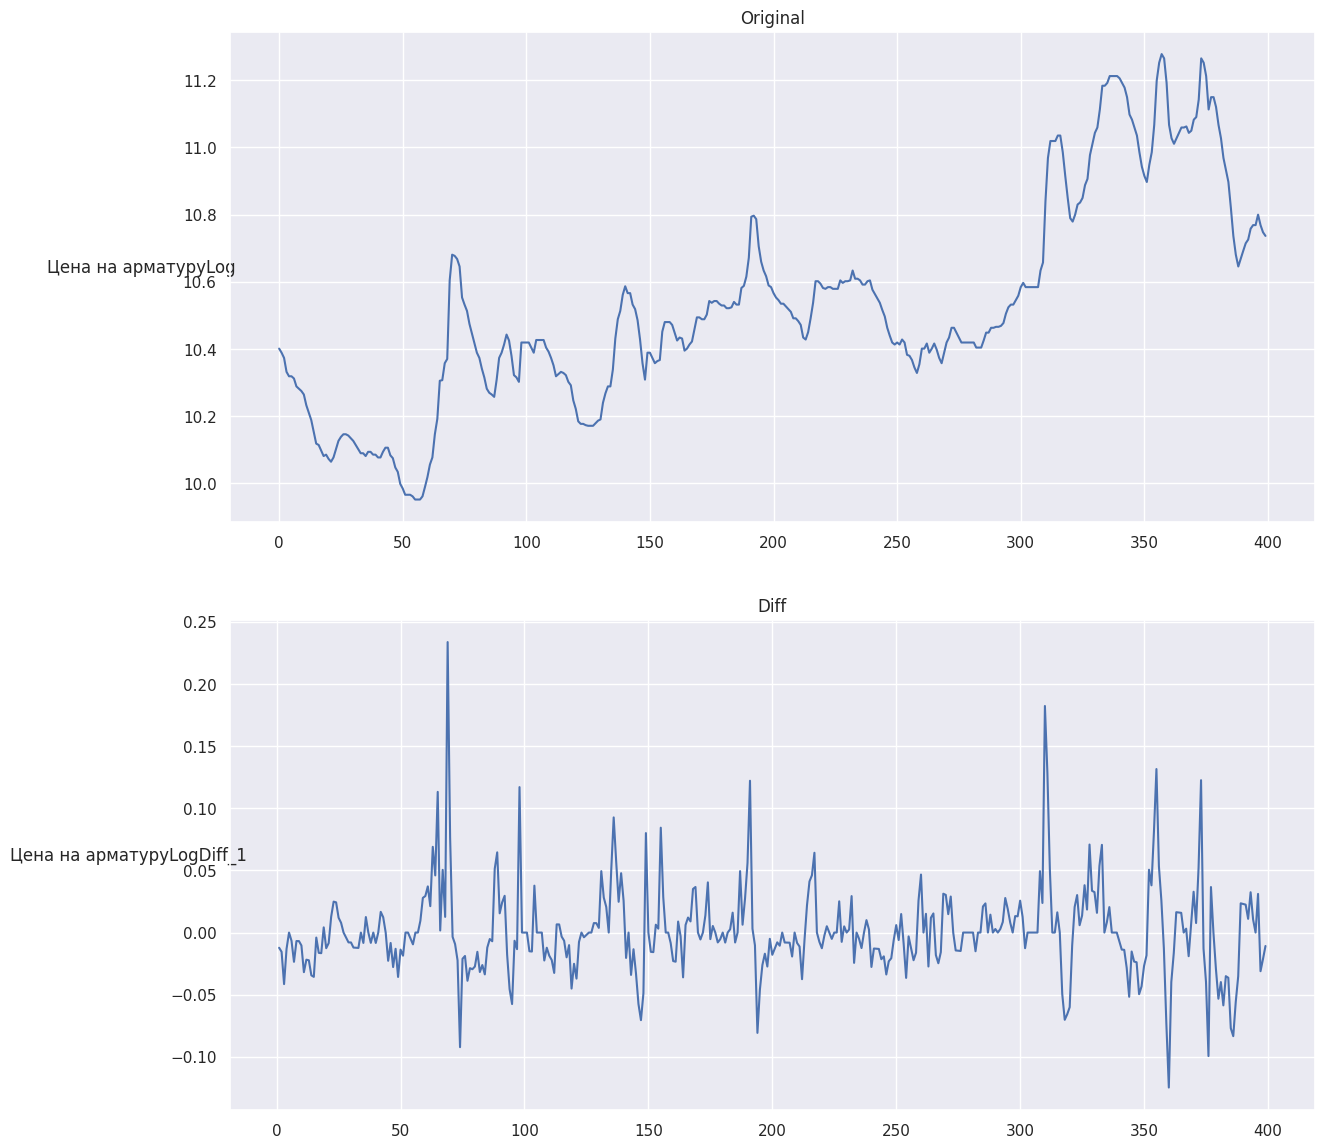

In [14]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('Цена на арматуруLog', rotation=0, labelpad=30)
train['Цена на арматуруLog'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('Цена на арматуруLogDiff_1', rotation=0, labelpad=30)
train['Цена на арматуруLogDiff_1'].plot(ax=ax);

In [15]:
p_value = adfuller(train['Цена на арматуруLogDiff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


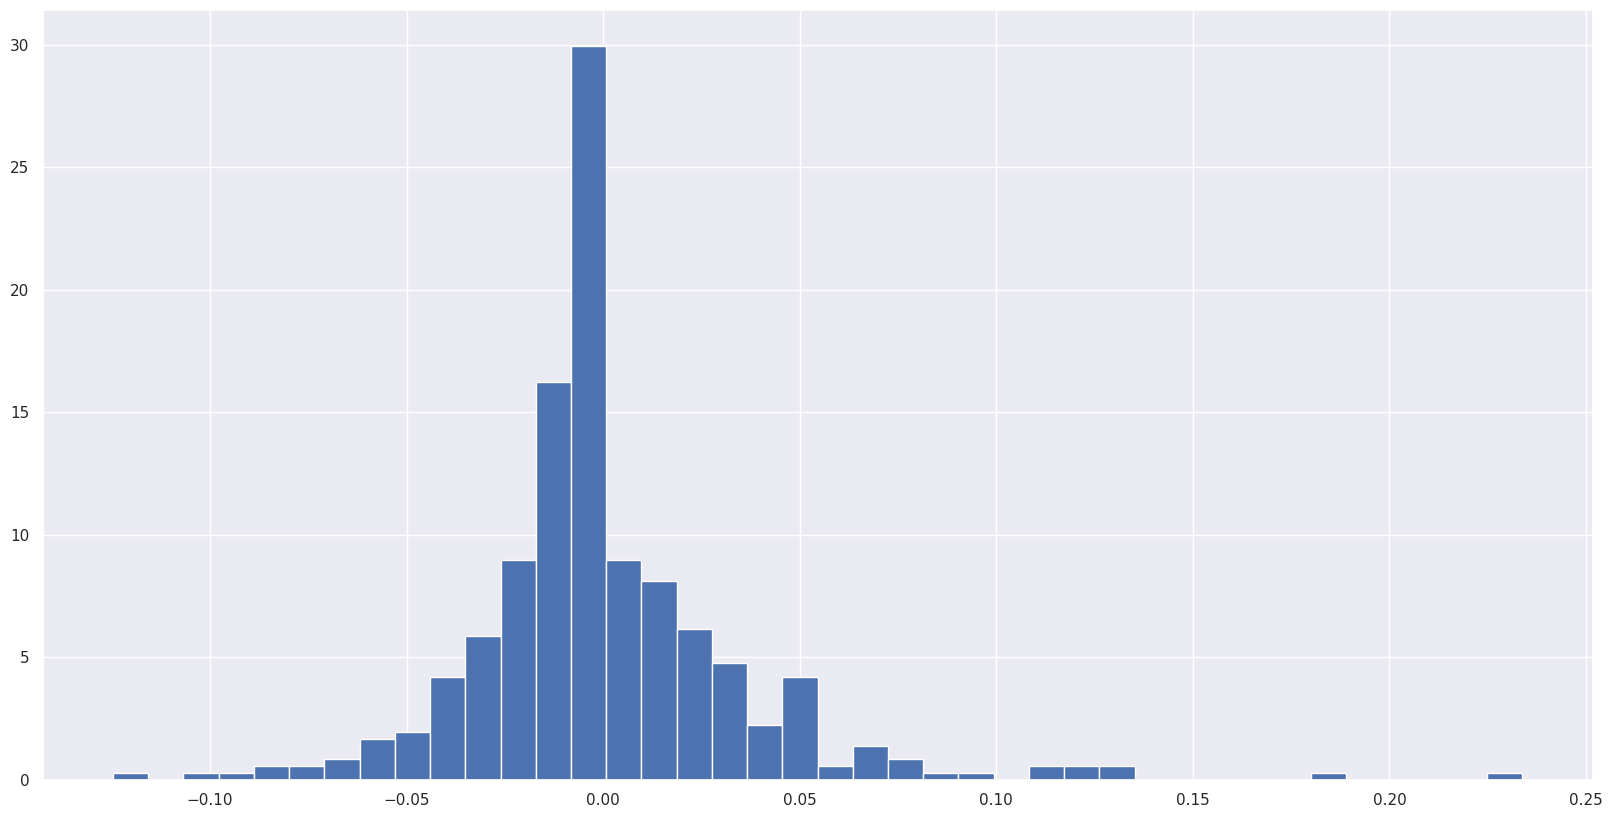

In [16]:
plt.hist(train['Цена на арматуруLogDiff_1'], density=True, bins=40);

ПРИЗНАК Цена на арматуруLogDiff_1 ОТОБРАЖАЕТСЯ СОМНИТЕЛЬНО, НЕОБХОДИМА ДОРАБОТКА

КОРЕЛОГРАММА

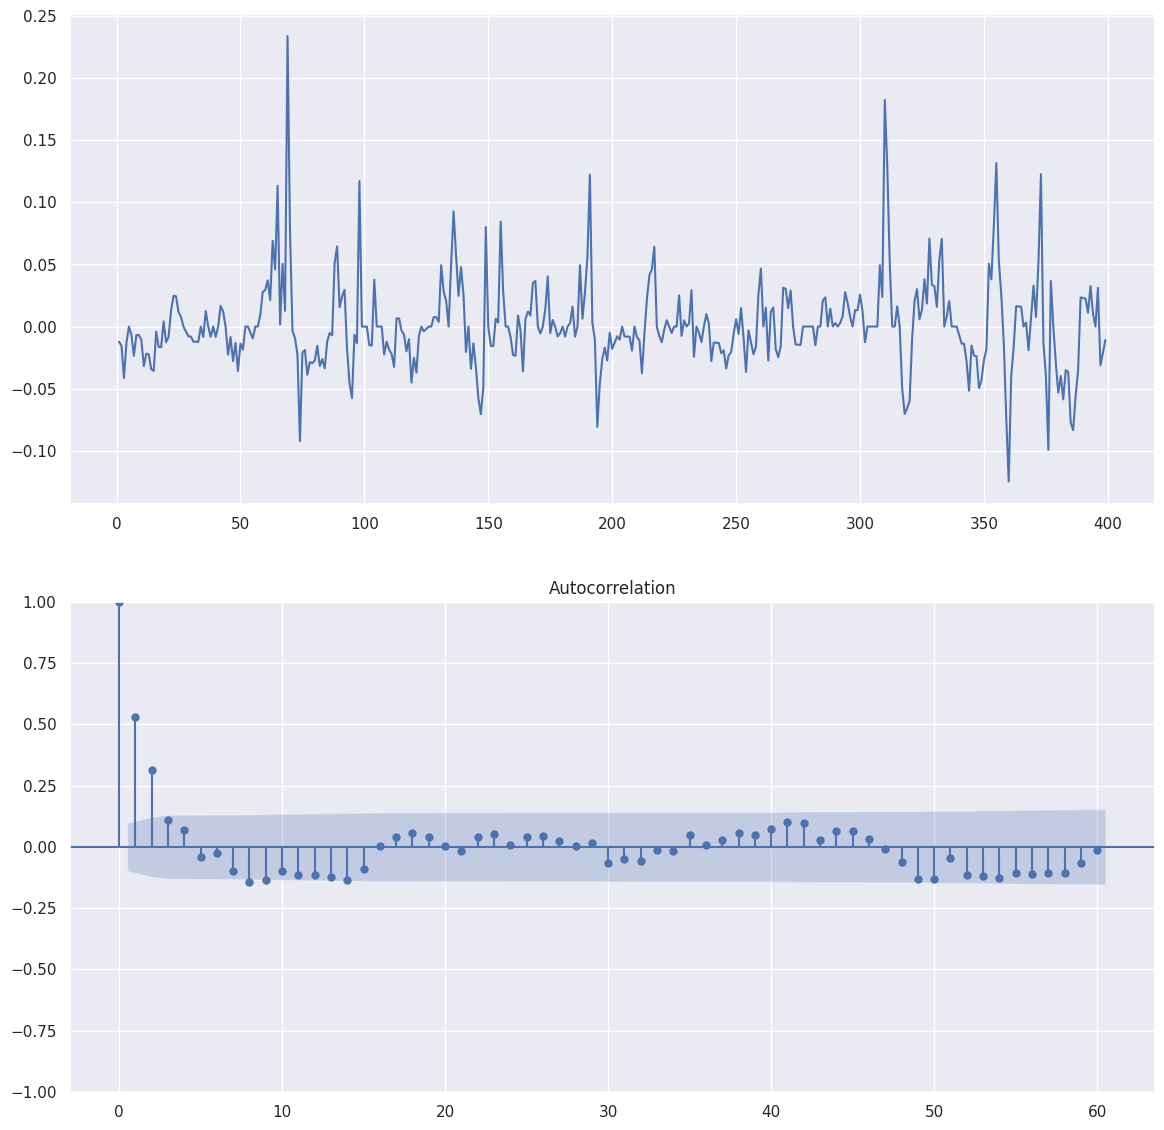

In [17]:
plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
train['Цена на арматуруLogDiff_1'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(train['Цена на арматуруLogDiff_1'][1:], lags=60, ax=ax);

ДОП.АНАЛИЗ

In [18]:
from statsmodels.tsa.ar_model import AR

In [19]:
train = pd.read_excel('gdrive/MyDrive/train.xlsx')
train

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [20]:
train.fillna(method='bfill', inplace=True)
train.fillna(value=0.0, inplace=True)
train

<ipython-input-20-bfb21800f4e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='bfill', inplace=True)


,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [25]:
import pandas as pd

# 1. Импортируем данные из файла
file_path = 'gdrive/MyDrive/train.xlsx'
train = pd.read_excel(file_path)  # Чтение файла

# 2. Проверяем, что столбец "Цена на арматуру" существует
if 'Цена на арматуру' in train.columns:
    # 3. Присваиваем данные из столбца "Цена на арматуру" переменной total
    total = train['Цена на арматуру'].values  # Преобразуем в массив NumPy
    print("Данные 'Цена на арматуру' успешно присвоены переменной total:")
    print(total)
else:
    print("Ошибка: Столбец 'Цена на арматуру' не найден в файле.")

# 4. Используем total в рабочем коде
# Например, можно передать эти данные в другую переменную или использовать для расчетов
series = total  # Пример использования
print("\nДанные в переменной series:")
print(series)

Данные 'Цена на арматуру' успешно присвоены переменной total:
[32900 32500 32000 30700 30300 30300 30100 29400 29200 29000 28700 27800
 27200 26600 25700 24800 24700 24300 23900 24000 23700 23500 23800 24400
 25000 25300 25500 25500 25400 25200 25000 24700 24400 24100 24100 23900
 24200 24200 24000 24000 23800 23800 24200 24500 24500 23950 23750 23100
 22800 22000 21700 21300 21300 21300 21200 21000 21000 21000 21200 21800
 22450 23300 23800 25500 26700 29900 29950 31500 31900 40300 43500 43350
 42950 42000 38300 37500 36800 35400 34400 33400 32500 32000 31000 30200
 29200 28850 28700 28500 30000 32000 32500 33300 34300 33700 32200 30400
 30200 29800 33500 33500 33500 33500 33000 32500 33750 33750 33750 33750
 33000 32600 32000 31300 30300 30500 30700 30600 30400 29800 29500 28200
 27500 26500 26300 26300 26200 26150 26150 26150 26350 26550 26650 28000
 28800 29400 29400 30900 33900 35900 36800 38600 39600 38800 38800 37500
 37000 35800 33800 31500 30000 32500 32500 32000 31500 31700 3

В БИБЛИОТЕКЕ STATSMODELS МОДЕЛЬ AR БЫЛА УДАЛЕНА И ЗАМЕНЕНА НА МОДЕЛЬ AUTOREG, ПОЭТОМУ ДАЛЕЕ БУДЕТ ИСПОЛЬЗОВАТЬСЯ ОНА

In [29]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# 1. Импортируем данные из файла
file_path = 'gdrive/MyDrive/train.xlsx'  # Укажите путь к вашему файлу
train = pd.read_excel(file_path)  # Чтение файла

# 2. Проверяем, что столбец "Цена на арматуру" существует
if 'Цена на арматуру' in train.columns:
    # 3. Присваиваем данные из столбца "Цена на арматуру" переменной total
    total = train['Цена на арматуру'].values  # Преобразуем в массив NumPy
    print("Данные 'Цена на арматуру' успешно присвоены переменной total:")
    print(total)
else:
    print("Ошибка: Столбец 'Цена на арматуру' не найден в файле.")

# 4. Используем total в рабочем коде
series = total  # Пример использования

# 5. Создаем и обучаем модель AutoReg
ar = AutoReg(series, lags=8).fit()  # Используем AutoReg вместо AR
print(ar.summary())  # Выводим информацию о модели

Данные 'Цена на арматуру' успешно присвоены переменной total:
[32900 32500 32000 30700 30300 30300 30100 29400 29200 29000 28700 27800
 27200 26600 25700 24800 24700 24300 23900 24000 23700 23500 23800 24400
 25000 25300 25500 25500 25400 25200 25000 24700 24400 24100 24100 23900
 24200 24200 24000 24000 23800 23800 24200 24500 24500 23950 23750 23100
 22800 22000 21700 21300 21300 21300 21200 21000 21000 21000 21200 21800
 22450 23300 23800 25500 26700 29900 29950 31500 31900 40300 43500 43350
 42950 42000 38300 37500 36800 35400 34400 33400 32500 32000 31000 30200
 29200 28850 28700 28500 30000 32000 32500 33300 34300 33700 32200 30400
 30200 29800 33500 33500 33500 33500 33000 32500 33750 33750 33750 33750
 33000 32600 32000 31300 30300 30500 30700 30600 30400 29800 29500 28200
 27500 26500 26300 26300 26200 26150 26150 26150 26350 26550 26650 28000
 28800 29400 29400 30900 33900 35900 36800 38600 39600 38800 38800 37500
 37000 35800 33800 31500 30000 32500 32500 32000 31500 31700 3

In [84]:
start = 0
end = len(series) - 1  # end = 399

# Делаем прогноз
prediction = ar.predict(start=start, end=end, dynamic=False)
print("Прогноз:")
print(prediction)

# Проверяем длину прогноза
print("Длина прогноза:", len(prediction))  # Должно быть 400

Прогноз:
[           nan            nan            nan            nan
            nan            nan            nan            nan
 29227.23050367 29237.69338718 29145.23022996 28659.76955269
 27481.93011621 27000.38247789 26533.89060553 25345.45046183
 24549.18170746 24892.19778847 24356.59274613 23880.73424666
 24370.18740331 23737.03822178 23621.87965936 24229.0938855
 24913.71120778 25538.61808698 25600.24830608 25745.19429717
 25646.74583399 25448.40765681 25216.7460214  25004.5288441
 24691.657843   24392.50886747 24128.62934206 24297.2428084
 24002.26208498 24552.82955928 24438.30177857 24008.63253845
 24250.96373251 23834.04460533 23989.01447203 24631.45997857
 24816.03829635 24664.45619669 23795.09352731 23804.82898372
 22950.29172988 22762.2279058  21819.39442769 21679.75751936
 21435.43872436 21468.42721905 21646.08387213 21316.31862934
 21178.74670501 21214.84440017 21248.0473795  21511.86895802
 22368.0585482  22997.55519056 23950.61813085 24234.78285015
 26568.94418945 27

In [85]:
sample = pd.read_excel('gdrive/MyDrive/train.xlsx')
sample

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [86]:
sample['Цена на арматуру'] = prediction
sample

,dt,Цена на арматуру
0,2015-01-05,NaN
1,2015-01-12,NaN
2,2015-01-19,NaN
3,2015-01-26,NaN
4,2015-02-02,NaN
...,...,...
395,2022-08-01,47840.156594
396,2022-08-08,47184.125992
397,2022-08-15,49823.942052
398,2022-08-22,46387.010209


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Цена на арматуру'].plot(kind='hist', bins=20, title='Цена на арматуру')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Цена на арматуру', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dt']
  ys = series['Цена на арматуру']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('dt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('Цена на арматуру')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['dt']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'dt'}, axis=1)
              .sort_values('dt', ascending=True))
  xs = counted['dt']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('dt', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dt')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Цена на арматуру']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Цена на арматуру')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Цена на арматуру'].plot(kind='line', figsize=(8, 4), title='Цена на арматуру')
plt.gca().spines[['top', 'right']].set_visible(False)

In [88]:
sample.to_csv('prediction_local.csv', index=False)

ГРАФИК

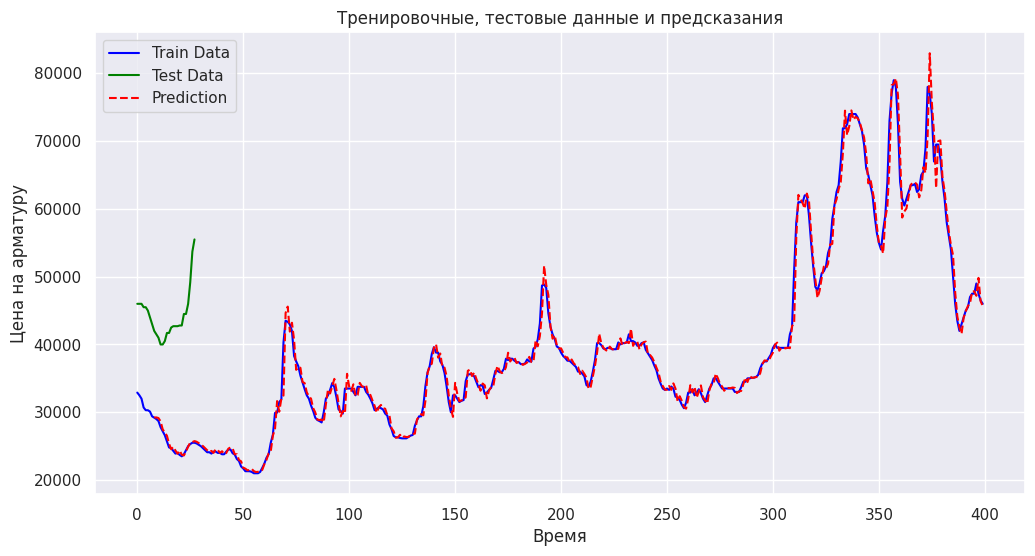

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Импортируем необходимые данные
train_data = pd.read_excel('gdrive/MyDrive/train.xlsx')
test_data = pd.read_excel('gdrive/MyDrive/test.xlsx')

# 2. Загружаем предсказания из файла
predictions = pd.read_csv('prediction_local.csv')

# 3. Подготовка данных для графика
# Предположим, что:
# - train_data и test_data содержат столбец 'Цена на арматуру' с фактическими значениями
# - predictions содержит столбец 'prediction' с предсказанными значениями

# Объединяем тренировочные и тестовые данные для визуализации
train_data['type'] = 'Train'  # Добавляем метку для тренировочных данных
test_data['type'] = 'Test'    # Добавляем метку для тестовых данных
predictions['type'] = 'Цена на арматуру'  # Добавляем метку для предсказаний

# Объединяем все данные в один DataFrame
combined_data = pd.concat([train_data, test_data, predictions])

# 4. Построение графика
plt.figure(figsize=(12, 6))

# График тренировочных данных
plt.plot(train_data.index, train_data['Цена на арматуру'], label='Train Data', color='blue')

# График тестовых данных
plt.plot(test_data.index, test_data['Цена на арматуру'], label='Test Data', color='green')

# График предсказаний
plt.plot(predictions.index, predictions['Цена на арматуру'], label='Prediction', color='red', linestyle='--')

# Настройка графика
plt.title('Тренировочные, тестовые данные и предсказания')
plt.xlabel('Время')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid(True)
plt.show()